<a href="https://colab.research.google.com/github/HemanthKumarBodduboina/FeynnLabs/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data = files.upload()

Saving mcdonalds.csv to mcdonalds.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/mcdonalds.csv")

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [6]:
df.shape

(1453, 15)

In [7]:
# selecting 10 rows from dataset
Top_rows = df.iloc[:, 0:11]

In [8]:
#convert yes to 1 and other to 0
Top_rows = (Top_rows=="Yes").astype(int)

In [9]:
Top_rows

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [10]:
# calcuate the column means and round to 2 decimals
Mean = Top_rows.mean().round(2)

In [11]:
Mean

,0
yummy,0.55
convenient,0.91
spicy,0.09
fattening,0.87
greasy,0.53
fast,0.90
cheap,0.60
tasty,0.64
expensive,0.36
healthy,0.20


In [15]:
#performing PCA
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(Top_rows)

In [16]:
# Summarize the PCA results
explained_variance = pca.explained_variance_ratio_
components = pca.components_
explained_variance
components

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

In [17]:
pca_df = pd.DataFrame(X, columns=[f'PC{i+1}' for i in range(X.shape[1])])

In [18]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


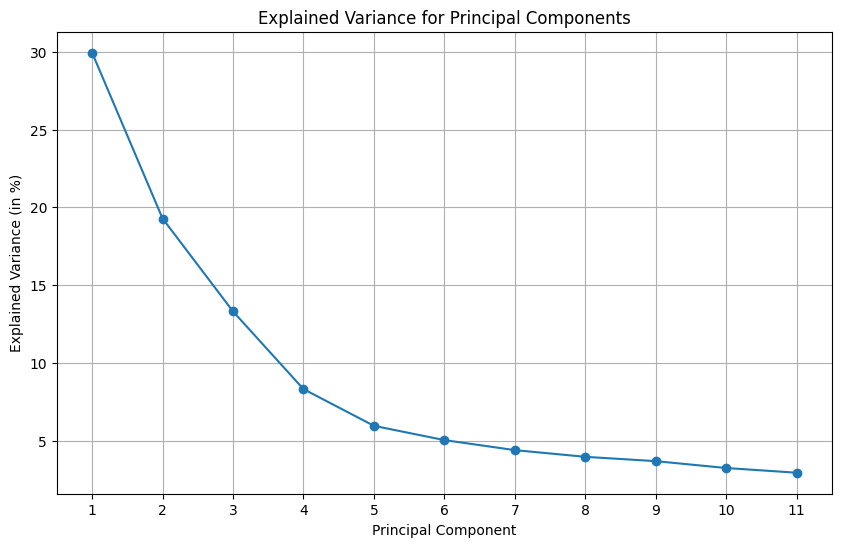

In [19]:
#Explained Variance for Principal Components

import matplotlib.pyplot as plt

explained_variance=pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1),
         explained_variance*100,
         marker='o'
)
plt.title("Explained Variance for Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (in %)")
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

In [21]:
import numpy as np

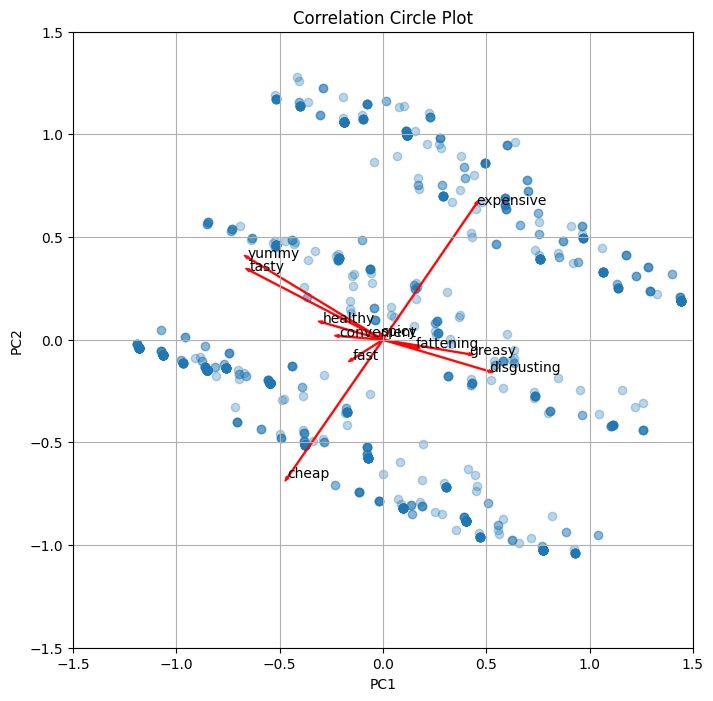

In [25]:
#Get the explained variance ratios for the selected components
explained_variance_ratio = pca.explained_variance_ratio_

#principal component vectors
vectors=pca.components_.T*np.sqrt(explained_variance_ratio)

#set figsize and other layout parameters

plt.figure(figsize=(8,8))


plt.title('Correlation Circle Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

#scatter plot
plt.scatter(X[:,0], X[:,1],alpha=0.3)

mul=2.5
for i, feature in enumerate(df.columns[:11]):

    plt.annotate(feature,(mul*vectors[i,0],mul*vectors[i,1]),color='k')

    plt.arrow(0,0,mul*vectors[i,0],mul*vectors[i,1],color='r',alpha=0.9,width=0.005)



plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

plt.grid(True)
plt.show()

In [26]:
X.dtype

dtype('float64')

In [27]:
from sklearn.cluster import KMeans

In [29]:
data_model = X

In [30]:
wcss = []

# Compute WCSS for different numbers of clusters
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Use a fixed random_state for reproducibility
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

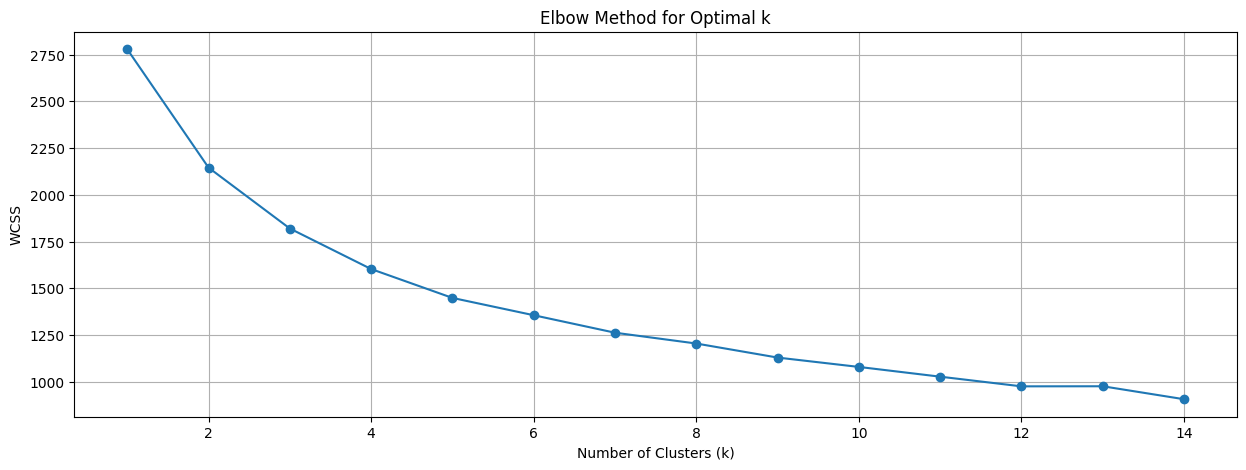

In [31]:
# Plot the Elbow Curve
plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [32]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [33]:
#performing PCA
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_model)

In [34]:
# Create and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)  # Specifying number of clusters( to 4)
data_predict = kmeans.fit_predict(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
# Add cluster labels to the PCA-reduced data for plotting
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data_predict

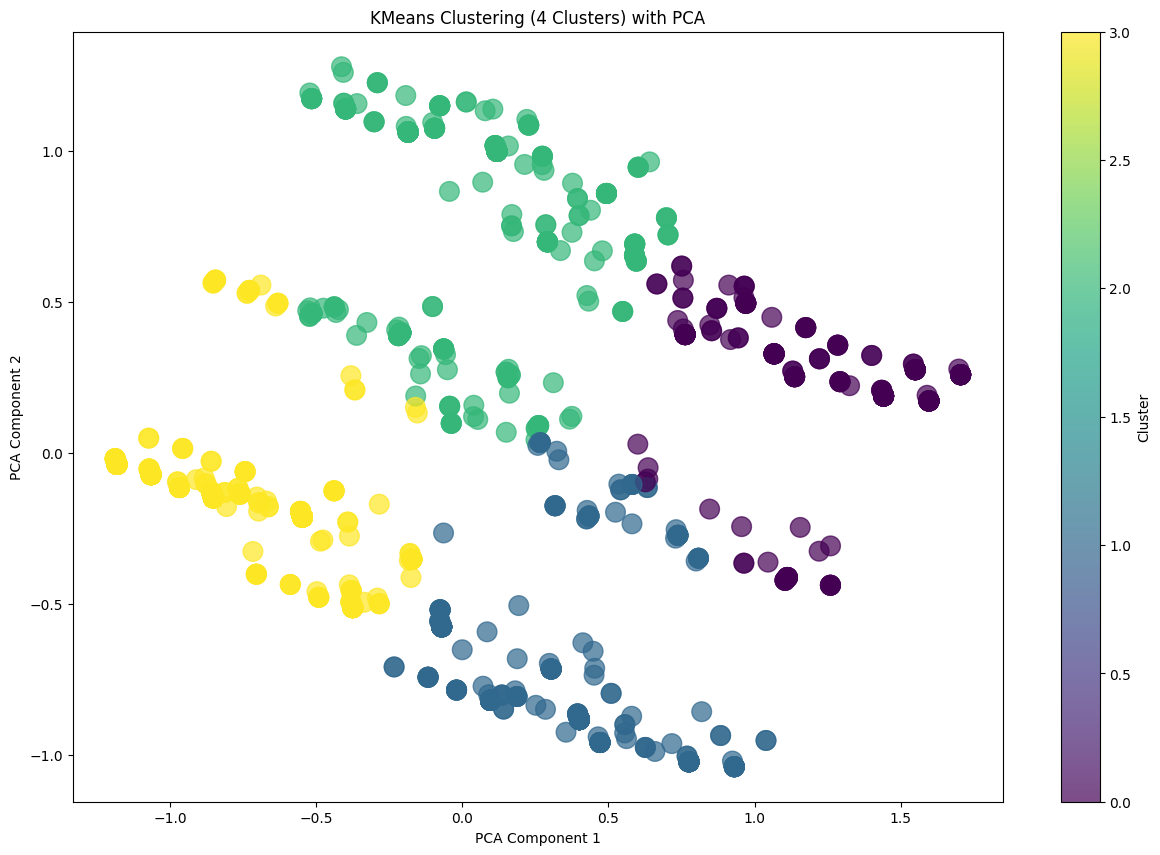

In [36]:
# Plotting the clusters
plt.figure(figsize=(15, 10))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], s=200, cmap='viridis', alpha=0.7)  # Use cmap for color map
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering (4 Clusters) with PCA")
plt.colorbar(label='Cluster')
plt.show()

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [38]:
# Perform hierarchical clustering
merg = linkage(data_model, method='ward')

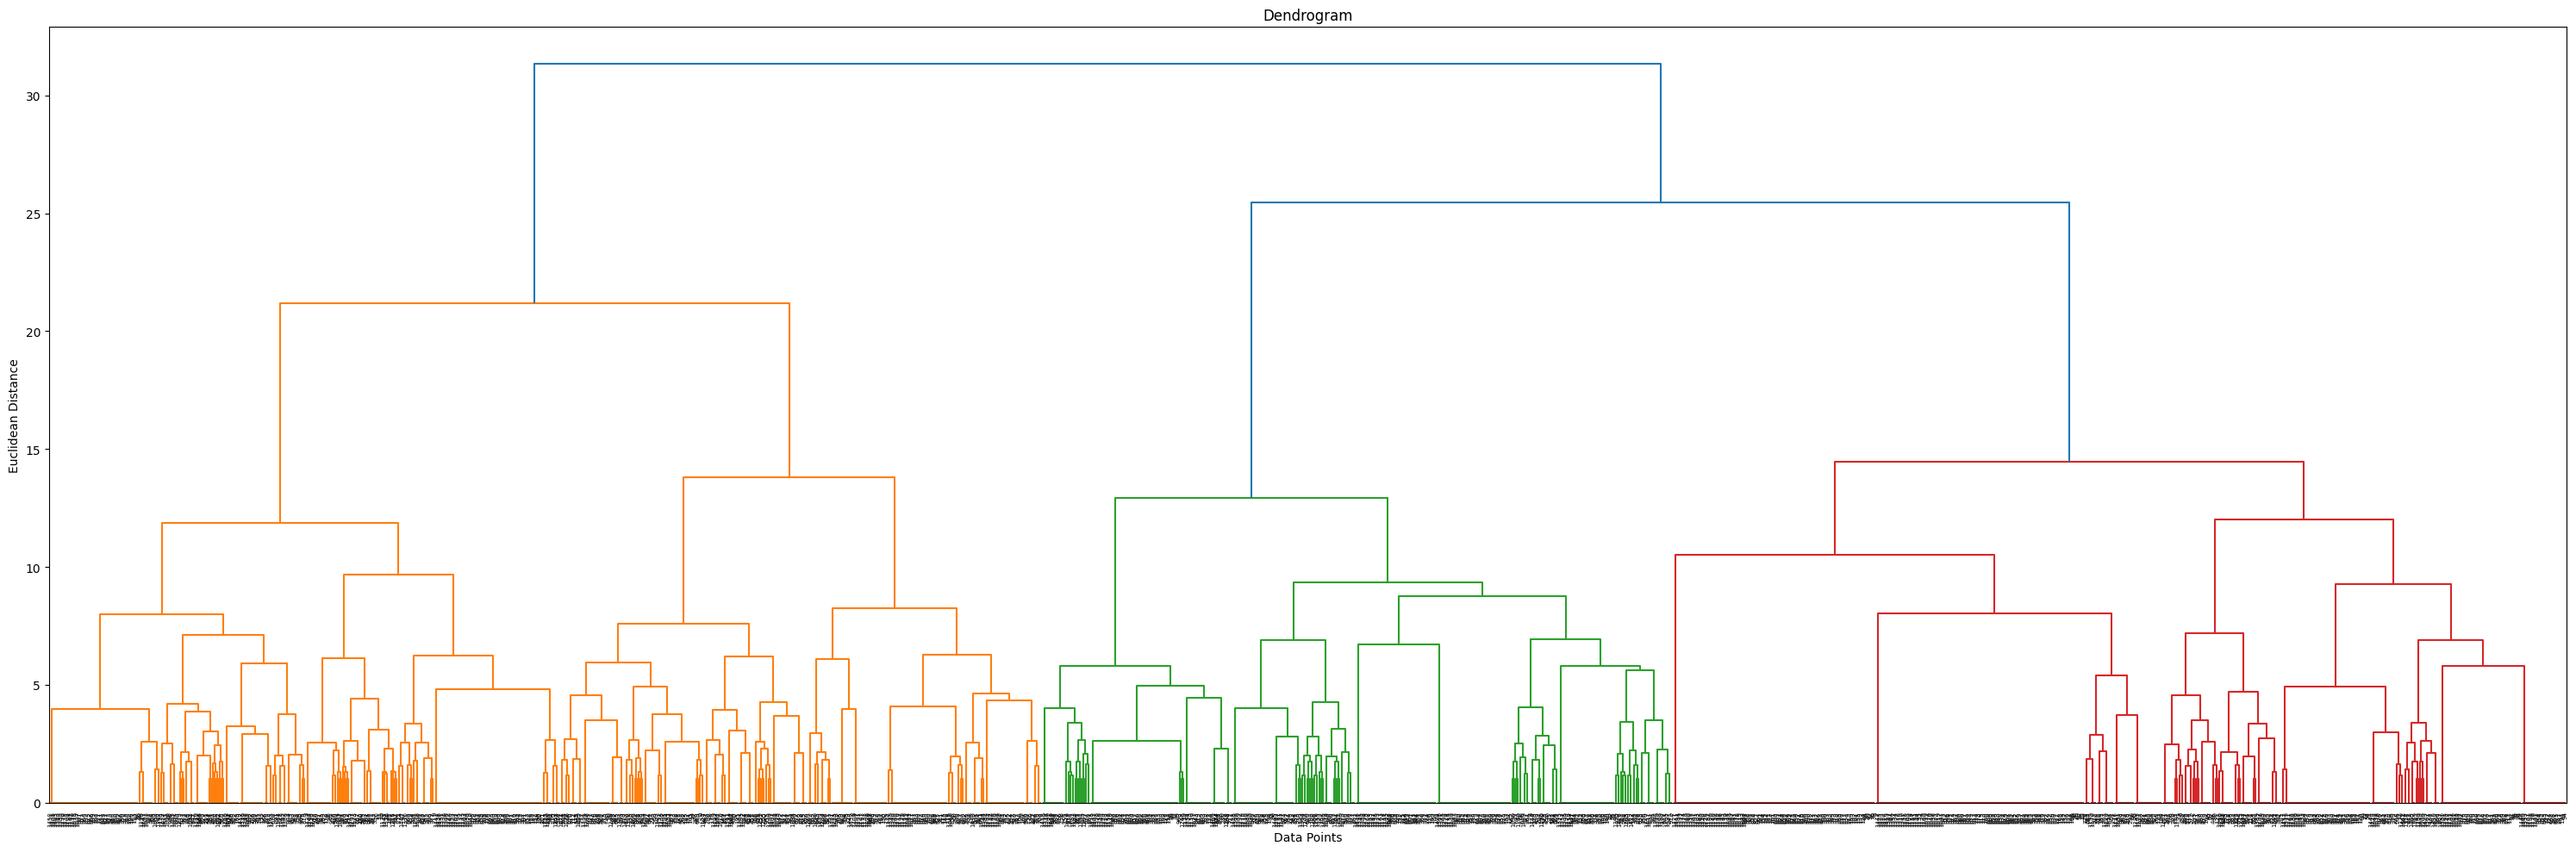

In [39]:
# Plot the dendrogram
plt.figure(figsize=(30,10))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.xticks(rotation=90)
plt.title("Dendrogram")
plt.tight_layout()
plt.show()

In [40]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


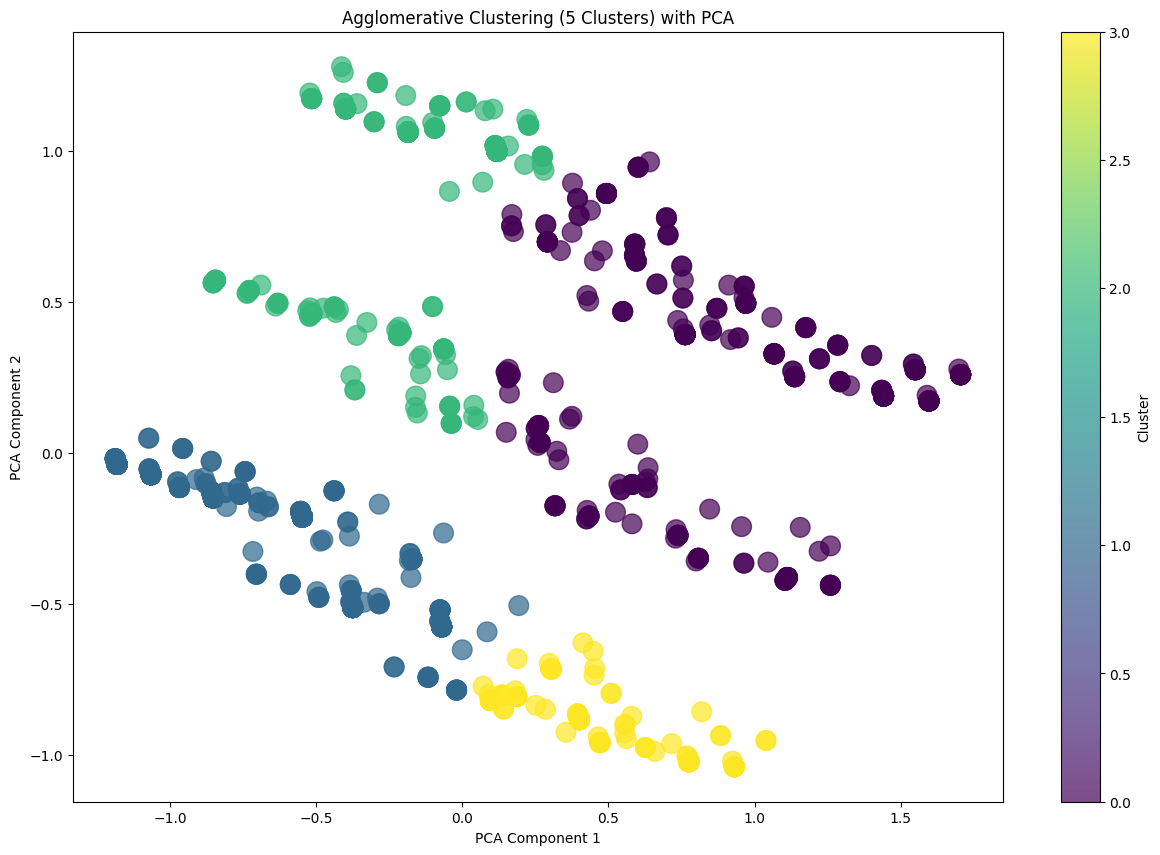

In [41]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_model)

# Create and fit the Agglomerative Clustering model
hiyerartical_cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
data_predict = hiyerartical_cluster.fit_predict(data_pca)

# Add cluster labels to the PCA-reduced data for plotting
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data_predict

# Plotting the clusters
plt.figure(figsize=(15, 10))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], s=200, cmap='viridis', alpha=0.7)  # Use cmap for color map
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering (5 Clusters) with PCA")
plt.colorbar(label='Cluster')
plt.show()

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Data
new_data = X

# Fit Gaussian Mixture Models (GMM) for k=2 to 8)
n_components_range = range(2, 9)
bic = []
aic = []
icl = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(data_new)

    bic_value = gmm.bic(data_new)
    aic_value = gmm.aic(data_new)

    bic.append(bic_value)
    aic.append(aic_value)

    icl_value = bic_value - 2 * (n_components - 1)
    icl.append(icl_value)

    print(f'Components: {n_components}')
    print(f'BIC: {bic_value}')
    print(f'AIC: {aic_value}')
    print(f'ICL: {icl_value}')

Components: 2
BIC: -14016.033346145448
AIC: -14834.648123998842
ICL: -14018.033346145448
Components: 3
BIC: -22234.173543054112
AIC: -23464.73640266599
ICL: -22238.173543054112
Components: 4
BIC: -25216.89681857369
AIC: -26859.407759944046
ICL: -25222.89681857369
Components: 5
BIC: -26575.355284640485
AIC: -28629.814307769324
ICL: -26583.355284640485
Components: 6
BIC: -33544.65803978264
AIC: -36011.06514466996
ICL: -33554.65803978264
Components: 7
BIC: -28967.147907814262
AIC: -31845.503094460066
ICL: -28979.147907814262
Components: 8
BIC: -39709.94660644368
AIC: -43000.24987484796
ICL: -39723.94660644368


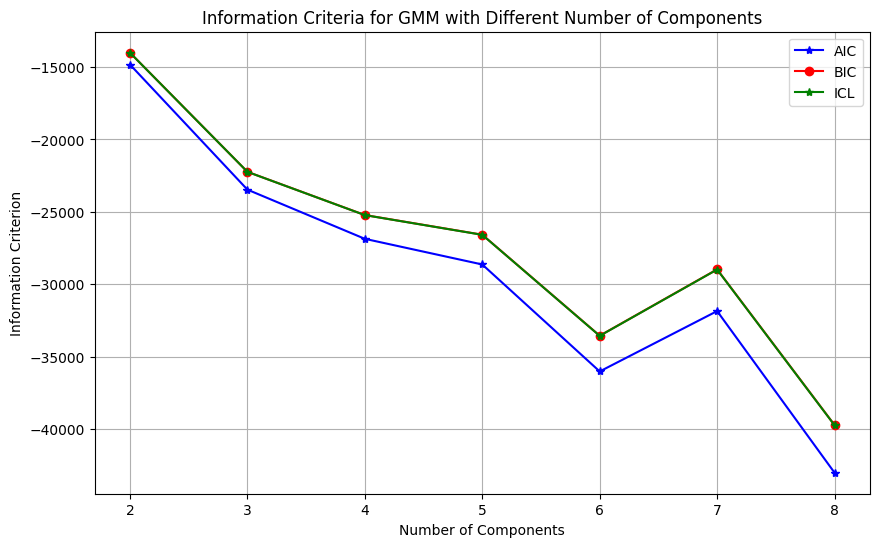

In [44]:
# Plot the BIC, AIC, and ICL values
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic, marker='*', linestyle='-', label='AIC', color='blue')
plt.plot(n_components_range, bic, marker='o', linestyle='-', label='BIC', color='red')
plt.plot(n_components_range, icl, marker='*', linestyle='-', label='ICL', color='green')

plt.xlabel("Number of Components")
plt.ylabel("Information Criterion")
plt.title("Information Criteria for GMM with Different Number of Components")
plt.legend()
plt.grid(True)
plt.show()

In [47]:

# Fit GMM with the chosen number of components

df= pd.DataFrame(new_data)

In [48]:
n_optimal_components = 4
gmm = GaussianMixture(n_components=n_optimal_components, random_state=1234)
gmm_labels = gmm.fit_predict(df)

# Add GMM cluster labels to the data
df['GMM_Cluster'] = gmm_labels

# Fit KMeans with the chosen number of clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_optimal_components, random_state=1234)
kmeans_labels = kmeans.fit_predict(new_data)

# Add KMeans cluster labels to the data
df['KMeans_Cluster'] = kmeans_labels

# Compare the clusters using cross-tabulation
comparison = pd.crosstab(df['KMeans_Cluster'], df['GMM_Cluster'])
print(comparison)

GMM_Cluster       0    1    2    3
KMeans_Cluster                    
0                99    8  253    7
1                 0  208   24    5
2               500    0    0   33
3                22   38    0  256


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [49]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'GMM_Cluster', 'KMeans_Cluster'], dtype='object')

In [50]:
df.rename(columns={i: name for i, name in enumerate(['yummy', 'tasty', 'cheap', 'fattening', 'convenient', 'fast', 'spicy', 'healthy', 'greasy', 'expensive', 'disgusting'])}, inplace=True)

In [51]:
df

,yummy,tasty,cheap,fattening,convenient,fast,spicy,healthy,greasy,expensive,disgusting,GMM_Cluster,KMeans_Cluster
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074,1,0
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440,3,3
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741,1,3
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034,0,2
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076,1,1
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671,0,2
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800,3,3
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316,0,2


In [53]:
from patsy import dmatrix

# Prepare independent variables (perceptions of McDonald's)
independent_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Create a formula string for regression
formula = 'Like.n ~ ' + ' + '.join(independent_vars)

In [54]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

# Convert categorical columns to numeric using LabelEncoder
categorical_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
label_encoders = {}

In [63]:
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare the data
X = df[independent_vars].astype(float)  # Convert to float
y = df['healthy'].astype(float)  # Convert target variable to float

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Gaussian Mixture Model (GMM) to identify clusters
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm_labels = gmm.fit_predict(X_scaled)

# Add GMM cluster labels to the data
data['GMM_Cluster'] = gmm_labels
# Fit Linear Regression for each cluster
models = {}
for cluster in np.unique(gmm_labels):
    cluster_data = df[df['GMM_Cluster'] == cluster]
    X_cluster = cluster_data[independent_vars]
    y_cluster = cluster_data['healthy']

    # Standardize the cluster data
    X_cluster_scaled = scaler.transform(X_cluster)
    y_cluster=y_cluster.fillna(y_cluster.mean())

    model = LinearRegression()
    model.fit(X_cluster_scaled, y_cluster)
    models[cluster] = model

# Assess the models
for cluster, model in models.items():
    print(f"Cluster {cluster} Coefficients:")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficients: {model.coef_}")
    print()

Cluster 0 Coefficients:
Intercept: 0.2005315585927372
Coefficients: [ 0.16816098  0.04917141 -0.0485876  -0.00660489  0.06744156 -0.03669382
  0.05040547  0.02111663 -0.01948381  0.27715216 -0.06096231]

Cluster 1 Coefficients:
Intercept: -0.038717014556424206
Coefficients: [ 1.57790848e-02  4.82084499e-04 -6.81593998e-04  1.39411933e-03
  1.99948415e-04 -4.79990187e-03  1.48764347e-03  1.92250159e-02
  6.45124988e-03  2.75461954e-01 -6.53307226e-03]



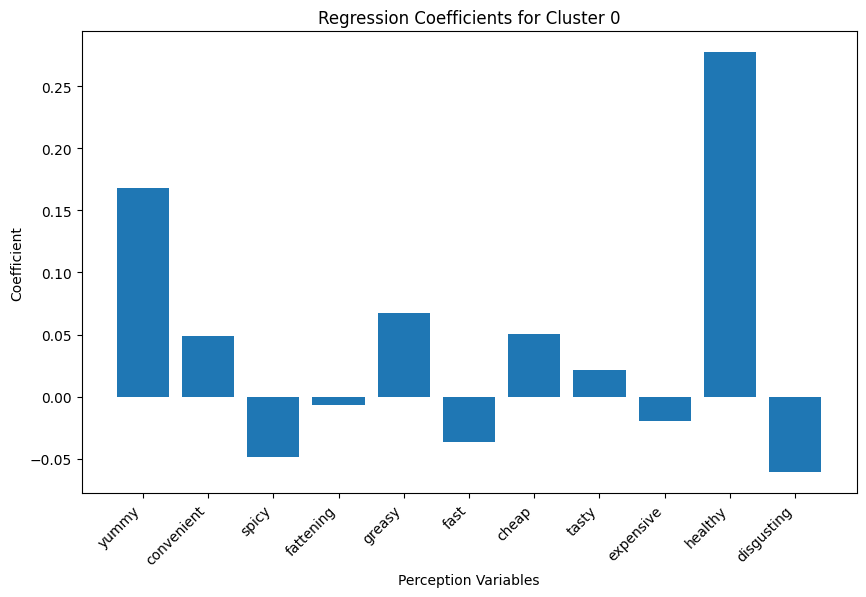

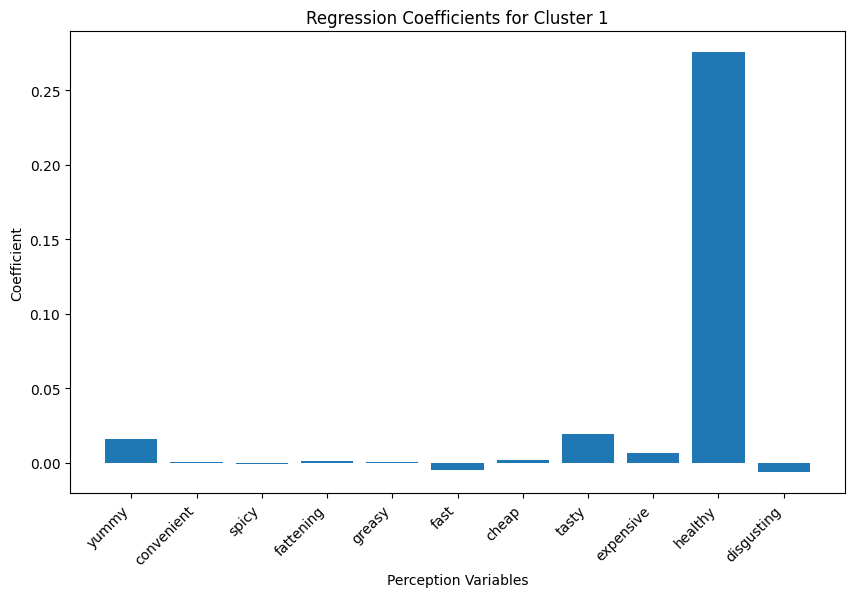

In [64]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Prepare the data for plotting
def plot_regression_coefficients(model, independent_vars, cluster):
    coefs = model.coef_
    intercept = model.intercept_

    plt.figure(figsize=(10, 6))
    plt.bar(independent_vars, coefs)
    plt.xlabel('Perception Variables')
    plt.ylabel('Coefficient')
    plt.title(f'Regression Coefficients for Cluster {cluster}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot coefficients for each cluster
for cluster, model in models.items():
    plot_regression_coefficients(model, independent_vars, cluster)

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Calculate the distance matrix on the transpose of x
distance_matrix = pdist(X.T, metric='euclidean')

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Get the order of the attributes
ordered_indices = dendrogram(Z, no_plot=True)['leaves']

# Reorder the columns in x based on the clustering results
x_reordered = X.iloc[:, ordered_indices]

In [76]:
import seaborn as sns

<ipython-input-77-e4458be24dfb>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=group.iloc[:, valid_indices], ci=None)
<ipython-input-77-e4458be24dfb>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=group.iloc[:, valid_indices], ci=None)
<ipython-input-77-e4458be24dfb>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=group.iloc[:, valid_indices], ci=None)
<ipython-input-77-e4458be24dfb>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=group.iloc[:, valid_indices], ci=None)


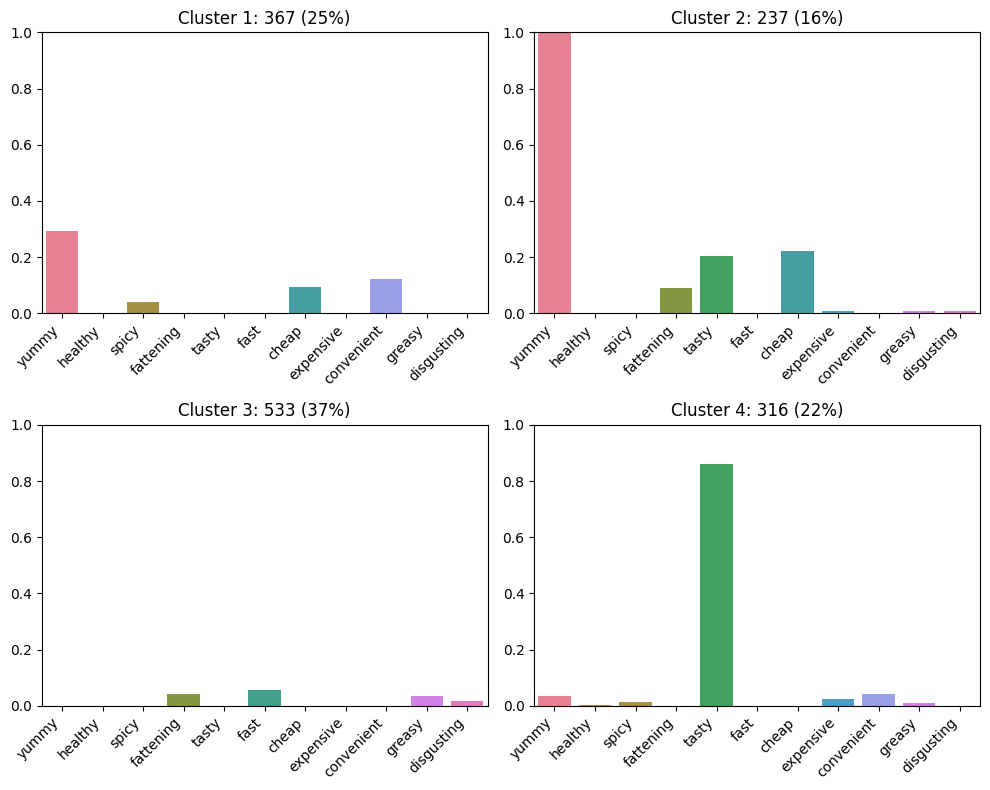

In [77]:

# Plot the segment profile plot
plt.figure(figsize=(10, 8))

for i, (cluster_name, group) in enumerate(df.drop(['GMM_Cluster'],axis=1).groupby('KMeans_Cluster')):
    plt.subplot(2, 2, i+1)
    # Ensure that ordered_indices are valid for the 'group' DataFrame
    valid_indices = [idx for idx in ordered_indices if idx < group.shape[1]]
    sns.barplot(data=group.iloc[:, valid_indices], ci=None)
    plt.title(f'Cluster {i+1}: {len(group)} ({len(group) / len(df) * 100:.0f}%)')

    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

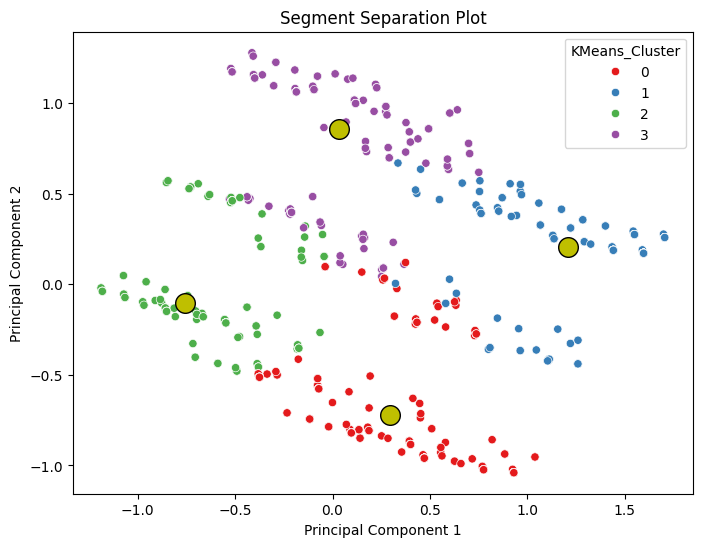

In [79]:

from sklearn.decomposition import PCA

# Perform PCA on the data
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

# Plot the segment separation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df['KMeans_Cluster'], palette='Set1')

# Add the cluster centers
centers = np.array([x_pca[df['KMeans_Cluster'] == i].mean(axis=0) for i in range(4)])
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='y', marker='o', edgecolor='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot')
plt.show()